## TensorFlow - Recommender System
With the advent of deep learning. Deep Recommender Systems have become very popular. In this notebook we will demonstrate the use of Deep Learning to make a recommender system.

In [1]:
#import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf

from tensorflow.keras.layers import (Input, 
                                     Dense, 
                                     Embedding, 
                                     Flatten, 
                                     Concatenate)
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import SGD, Adam

from sklearn.utils import shuffle

In [2]:
#Lets download the movie lens dataset fromchttps://grouplens.org/datasets/movielens/
!wget -nc http://files.grouplens.org/datasets/movielens/ml-20m.zip

--2020-09-29 18:24:40--  http://files.grouplens.org/datasets/movielens/ml-20m.zip
Resolving files.grouplens.org (files.grouplens.org)... 128.101.65.152
Connecting to files.grouplens.org (files.grouplens.org)|128.101.65.152|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 198702078 (189M) [application/zip]
Saving to: ‘ml-20m.zip’

ml-20m.zip          100%[===================>] 189.50M  24.6MB/s    in 8.5s    

2020-09-29 18:24:49 (22.4 MB/s) - ‘ml-20m.zip’ saved [198702078/198702078]



In [3]:
!unzip -n ml-20m.zip

Archive:  ml-20m.zip
   creating: ml-20m/
  inflating: ml-20m/genome-scores.csv  
  inflating: ml-20m/genome-tags.csv  
  inflating: ml-20m/links.csv        
  inflating: ml-20m/movies.csv       
  inflating: ml-20m/ratings.csv      
  inflating: ml-20m/README.txt       
  inflating: ml-20m/tags.csv         


In [4]:
df = pd.read_csv('ml-20m/ratings.csv')
df.head()

,userId,movieId,rating,timestamp
0,1,2,3.5,1112486027
1,1,29,3.5,1112484676
2,1,32,3.5,1112484819
3,1,47,3.5,1112484727
4,1,50,3.5,1112484580


In [5]:
#Convert Userids and movieIds to a categorical variables
df.userId = pd.Categorical(df.userId)
df['new_user_id'] = df.userId.cat.codes

df.movieId = pd.Categorical(df.movieId)
df['new_movie_id'] = df.movieId.cat.codes

In [6]:
user_ids = df['new_user_id'].values
movie_ids = df['new_movie_id'].values
ratings = df['rating'].values

In [7]:
# Get number of users and number of movies
N = len(set(user_ids))
M = len(set(movie_ids))

# Set embedding dimension
K = 10

In [8]:
# Make a neural network

# User input
u = Input(shape=(1,))

# Movie input
m = Input(shape=(1,))

# User embedding
u_emb = Embedding(N, K)(u) 

# Movie embedding
m_emb = Embedding(M, K)(m) 

# Flatten both embeddings
u_emb = Flatten()(u_emb) 
m_emb = Flatten()(m_emb) 

# Concatenate user-movie embeddings into a feature vector
x = Concatenate()([u_emb, m_emb]) 

x = Dense(1024, activation='relu')(x)
x = Dense(1)(x)

In [9]:
# Build the model and compile
model = Model(inputs=[u, m], outputs=x)
model.compile(
  loss='mse',
  optimizer='adam',
)

In [10]:
# split the data
user_ids, movie_ids, ratings = shuffle(user_ids, movie_ids, ratings)
Ntrain = int(0.8 * len(ratings))
train_user = user_ids[:Ntrain]
train_movie = movie_ids[:Ntrain]
train_ratings = ratings[:Ntrain]

test_user = user_ids[Ntrain:]
test_movie = movie_ids[Ntrain:]
test_ratings = ratings[Ntrain:]

avg_rating = train_ratings.mean()
train_ratings = train_ratings - avg_rating
test_ratings = test_ratings - avg_rating

In [11]:
r = model.fit(
  x=[train_user, train_movie],
  y=train_ratings,
  epochs=10,
  batch_size=1024,
  verbose=2, 
  validation_data=([test_user, test_movie], test_ratings),
)

Epoch 1/10
15626/15626 - 222s - loss: 0.7312 - val_loss: 0.6900
Epoch 2/10
15626/15626 - 221s - loss: 0.6663 - val_loss: 0.6637
Epoch 3/10
15626/15626 - 209s - loss: 0.6298 - val_loss: 0.6441
Epoch 4/10
15626/15626 - 209s - loss: 0.6033 - val_loss: 0.6357
Epoch 5/10
15626/15626 - 209s - loss: 0.5866 - val_loss: 0.6309
Epoch 6/10
15626/15626 - 211s - loss: 0.5751 - val_loss: 0.6290
Epoch 7/10
15626/15626 - 213s - loss: 0.5669 - val_loss: 0.6281
Epoch 8/10
15626/15626 - 214s - loss: 0.5609 - val_loss: 0.6264
Epoch 9/10
15626/15626 - 211s - loss: 0.5560 - val_loss: 0.6283
Epoch 10/10
15626/15626 - 210s - loss: 0.5521 - val_loss: 0.6277


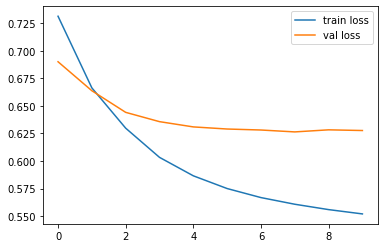

In [12]:
# plot losses
plt.plot(r.history['loss'], label="train loss")
plt.plot(r.history['val_loss'], label="val loss")
plt.legend()
plt.show()